### Importing keras library to import model

In [1]:
from keras.models import load_model
import matplotlib.pyplot as plt

### Loading the trained model (Alphanumeric predictor)

In [2]:
model = load_model('alphanum_colab.h5')

### Function to predict model

In [3]:

from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np
import cv2
from PIL import Image, ImageOps

model = load_model('alphanum_colab.h5')

def predict_digit(img):
    print(type(img))
    
    img = ImageOps.invert(img)
    img = np.array(img)
    img = cv2.resize(img, (28,28))
    
    #convert rgb to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #reshaping to support our model input and normalizing
    img = img.reshape(28,28,1)
    
    #ploting the canvas image
    #plt.imshow(img,cmap = 'gray')
    img = img.reshape(1,28,28,1)
    img = img/255.0
    
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res,axis=0) , max(res)

### Class - for drawing on Canvas and prediction 

In [4]:
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=560, height=560, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect) 
        digit, acc = predict_digit(im)
        plt.imshow(im,cmap = 'gray')
        alpha = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
        if digit < 26:
            digit = alpha[digit]
        else:
            digit = digit - 26
        self.label.configure(text= str(digit) ) 
#                              +', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')


<class 'PIL.Image.Image'>


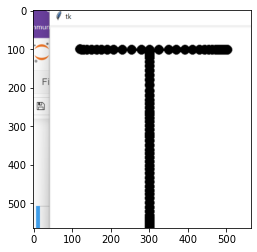

In [6]:
app = App()
mainloop()